In [1]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Hypothesis testing
from scipy import stats
import  statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest # used in proportion test
from statsmodels.stats.multicomp import pairwise_tukeyhsd # used in posthoc ANOVA
import math # used in confidence interval range computation in proportion test

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from statsmodels.formula.api import logit
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [4]:
# Loading Data
H=pd.read_csv("/content/drive/MyDrive/csvData.csv")
H.head(10)

cca2        country      pop2022      pop2021      pop2020      pop2050  \
0   CN          China  1425887.337  1425893.465  1424929.781  1312636.325   
1   IN          India  1417173.173  1407563.842  1396387.127  1670490.596   
2   US  United States   338289.857   336997.624   335942.003   375391.963   
3   ID      Indonesia   275501.339   273753.191   271857.970   317225.213   
4   PK       Pakistan   235824.862   231402.117   227196.741   367808.468   
5   NG        Nigeria   218541.212   213401.323   208327.405   377459.883   
6   BR         Brazil   215313.498   214326.223   213196.304   230885.725   
7   BD     Bangladesh   171186.372   169356.251   167420.951   203904.900   
8   RU         Russia   144713.314   145102.755   145617.329   133133.035   
9   MX         Mexico   127504.125   126705.138   125998.302   143772.364   

       pop2030      pop2015      pop2010      pop2000      pop1990  \
0  1415605.906  1393715.448  1348191.368  1264099.069  1153704.252   
1  1514994.080  1322866.505  1240613.620  1059633.675   870452.165   
2   352162.301   324607.776   311182.845   282398.554   248083.732   
3   292150.100   259091.970   244016.173   214072.421   182159.874   
4   274029.836   210969.298   194454.498   154369.924   115414.069   
5   262580.426   183995.785   160952.853   122851.984    95214.257   
6   223908.968   205188.205   196353.492   175873.720   150706.446   
7   184424.144   157830.000   148391.139   129193.327   107147.651   
8   141432.741   144668.389   143242.599   146844.839   148005.704   
9   134534.107   120149.897   112532.401    97873.442    81720.428   

      pop1980     pop1970      area  landAreaKm    density  GrowthRate  \
0  982372.466  822534.450   9706961   9424702.9   151.2926      1.0000   
1  696828.385  557501.301   3287590   2973190.0   476.6507      1.0068   
2  223140.018  200328.340   9372610   9147420.0    36.9820      1.0038   
3  148177.096  115228.394   1904569   1877519.0   146.7369      1.0064   
4   80624.057   59290.872    881912    770880.0   305.9164      1.0191   
5   72951.439   55569.264    923768    910770.0   239.9521      1.0241   
6  122288.383   96369.875   8515767   8358140.0    25.7609      1.0046   
7   83929.765   67541.860    147570    130170.0  1315.0985      1.0108   
8  138257.420  130093.010  17098242  16376870.0     8.8364      0.9973   
9   67705.186   50289.306   1964375   1943950.0    65.5902      1.0063   

   WorldPercentage  rank  
0           0.1788     1  
1           0.1777     2  
2           0.0424     3  
3           0.0345     4  
4           0.0296     5  
5           0.0274     6  
6           0.0270     7  
7           0.0215     8  
8           0.0181     9  
9           0.0160    10

In [5]:
H.shape

(234, 19)

###Data sheet arrangement

In [6]:
df_new = H.rename(columns={'pop2022':'2022','pop2021':'2021','pop2020':'2020','pop2050':'2050','pop2030':'2030','pop2015':'2015','pop2010':'2010','pop2000':'2000','pop1990':'1990','pop1980':'1980','pop1970':'1970'},inplace=False)
df_new.head()

cca2        country         2022         2021         2020         2050  \
0   CN          China  1425887.337  1425893.465  1424929.781  1312636.325   
1   IN          India  1417173.173  1407563.842  1396387.127  1670490.596   
2   US  United States   338289.857   336997.624   335942.003   375391.963   
3   ID      Indonesia   275501.339   273753.191   271857.970   317225.213   
4   PK       Pakistan   235824.862   231402.117   227196.741   367808.468   

          2030         2015         2010         2000         1990  \
0  1415605.906  1393715.448  1348191.368  1264099.069  1153704.252   
1  1514994.080  1322866.505  1240613.620  1059633.675   870452.165   
2   352162.301   324607.776   311182.845   282398.554   248083.732   
3   292150.100   259091.970   244016.173   214072.421   182159.874   
4   274029.836   210969.298   194454.498   154369.924   115414.069   

         1980        1970     area  landAreaKm   density  GrowthRate  \
0  982372.466  822534.450  9706961   9424702.9  151.2926      1.0000   
1  696828.385  557501.301  3287590   2973190.0  476.6507      1.0068   
2  223140.018  200328.340  9372610   9147420.0   36.9820      1.0038   
3  148177.096  115228.394  1904569   1877519.0  146.7369      1.0064   
4   80624.057   59290.872   881912    770880.0  305.9164      1.0191   

   WorldPercentage  rank  
0           0.1788     1  
1           0.1777     2  
2           0.0424     3  
3           0.0345     4  
4           0.0296     5

###Expected World Population 100 years

In [7]:
df=df_new[['country','1970','1980','1990','2000','2010','2015' ,'2020','2021','2022','2030','2050']].copy()
df.head()

country        1970        1980         1990         2000  \
0          China  822534.450  982372.466  1153704.252  1264099.069   
1          India  557501.301  696828.385   870452.165  1059633.675   
2  United States  200328.340  223140.018   248083.732   282398.554   
3      Indonesia  115228.394  148177.096   182159.874   214072.421   
4       Pakistan   59290.872   80624.057   115414.069   154369.924   

          2010         2015         2020         2021         2022  \
0  1348191.368  1393715.448  1424929.781  1425893.465  1425887.337   
1  1240613.620  1322866.505  1396387.127  1407563.842  1417173.173   
2   311182.845   324607.776   335942.003   336997.624   338289.857   
3   244016.173   259091.970   271857.970   273753.191   275501.339   
4   194454.498   210969.298   227196.741   231402.117   235824.862   

          2030         2050  
0  1415605.906  1312636.325  
1  1514994.080  1670490.596  
2   352162.301   375391.963  
3   292150.100   317225.213  
4   274029.836   367808.468

In [ ]:
df_p=df_new[['country','1970','1980','1990','2000','2010','2020']].copy()
df_p.head()

country        1970        1980         1990         2000  \
0          China  822534.450  982372.466  1153704.252  1264099.069   
1          India  557501.301  696828.385   870452.165  1059633.675   
2  United States  200328.340  223140.018   248083.732   282398.554   
3      Indonesia  115228.394  148177.096   182159.874   214072.421   
4       Pakistan   59290.872   80624.057   115414.069   154369.924   

          2010         2020  
0  1348191.368  1424929.781  
1  1240613.620  1396387.127  
2   311182.845   335942.003  
3   244016.173   271857.970  
4   194454.498   227196.741

In [ ]:
df_p.sort_values(by='country', inplace=True)
df_p

country       1970       1980       1990       2000       2010  \
35         Afghanistan  10752.971  12486.631  10694.796  19542.982  28189.672   
137            Albania   2324.731   2941.651   3295.066   3182.021   2913.399   
33             Algeria  13795.915  18739.378  25518.074  30774.621  35856.344   
212     American Samoa     27.075     32.886     47.818     58.230     54.849   
202            Andorra     19.860     35.611     53.569     66.097     71.519   
..                 ...        ...        ...        ...        ...        ...   
225  Wallis and Futuna      9.377     11.315     13.454     14.723     13.142   
171     Western Sahara     76.371    116.775    178.529    270.375    413.296   
45               Yemen   6843.607   9204.938  13375.121  18628.700  24743.946   
62              Zambia   4281.671   5720.438   7686.401   9891.136  13792.086   
73            Zimbabwe   5202.918   7049.926  10113.893  11834.676  12839.771   

          2020  
35   38972.230  
137   2866.849  
33   43451.666  
212     46.189  
202     77.700  
..         ...  
225     11.655  
171    556.048  
45   32284.046  
62   18927.715  
73   15669.666  

[234 rows x 7 columns]

###country having least population During period of 1970 to 2020

In [ ]:
df2 = df_p.sort_values(['1970'],
              ascending = [True])
df2.head(5)

country   1970   1980   1990   2000   2010    2020
233      Vatican City  0.752  0.733  0.700  0.651  0.596   0.520
232           Tokelau  1.714  1.647  1.669  1.666  1.367   1.827
230  Falkland Islands  2.274  2.240  2.332  3.080  3.187   3.747
227  Saint Barthelemy  2.417  2.983  5.168  7.082  8.988  10.681
231              Niue  5.185  3.637  2.533  2.074  1.812   1.942

In [ ]:
df3 = df_new.sort_values(['landAreaKm'],
              ascending = [True])
df3.head(5)

cca2       country    2022    2021    2020    2050    2030    2015  \
233   VA  Vatican City   0.510   0.511   0.520   0.731   0.561   0.564   
216   MC        Monaco  36.469  36.686  36.922  37.664  35.862  36.760   
218   GI     Gibraltar  32.649  32.669  32.709  31.356  32.771  32.520   
232   TK       Tokelau   1.871   1.849   1.827   2.430   2.046   1.454   
224   NR         Nauru  12.668  12.511  12.315  14.695  13.358  11.185   

       2010    2000    1990    1980    1970  area  landAreaKm     density  \
233   0.596   0.651   0.700   0.733   0.752     1        0.44   1159.0909   
216  33.178  32.465  30.329  27.076  24.270     2        2.00  18234.5000   
218  31.262  27.741  27.317  28.734  26.685     6        6.80   4801.3235   
232   1.367   1.666   1.669   1.647   1.714    12       10.00    187.1000   
224  10.241  10.377   9.598   7.635   6.663    21       20.00    633.4000   

     GrowthRate  WorldPercentage  rank  
233      0.9980              0.0   234  
216      0.9941              0.0   217  
218      0.9994              0.0   219  
232      1.0119              0.0   233  
224      1.0125              0.0   225

In [ ]:
df4 = df_new.sort_values(['density'],
            ascending = [True])
df4.head(5)

cca2           country      2022      2021      2020      2050      2030  \
207   GL         Greenland    56.466    56.243    56.026    53.997    57.152   
230   FK  Falkland Islands     3.780     3.764     3.747     3.779     3.869   
171   EH    Western Sahara   575.986   565.581   556.048   851.067   662.726   
133   MN          Mongolia  3398.366  3347.782  3294.335  4518.856  3736.327   
144  NaN           Namibia  2567.012  2530.151  2489.098  3779.918  2910.056   

         2015      2010      2000      1990      1980      1970     area  \
207    55.895    56.351    56.184    55.599    50.106    45.434  2166086   
230     3.408     3.187     3.080     2.332     2.240     2.274    12173   
171   491.824   413.296   270.375   178.529   116.775    76.371   266000   
133  2964.749  2702.520  2450.979  2161.433  1697.780  1293.880  1564110   
144  2282.704  2099.271  1819.141  1369.011   975.994   754.467   825615   

     landAreaKm  density  GrowthRate  WorldPercentage  rank  
207    410450.0   0.1376      1.0040           0.0000   208  
230     12173.0   0.3105      1.0043           0.0000   231  
171    266000.0   2.1654      1.0184           0.0001   172  
133   1557506.8   2.1819      1.0151           0.0004   134  
144    823290.0   3.1180      1.0146           0.0003   145

###Visualisation of  World population

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Load the data into a Pandas dataframe

H=pd.read_csv("/content/drive/MyDrive/csvData.csv",index_col='country')

def compare_area_landAreaKm():
    # Prompt the user for a country name
    country = input('Enter the name of the country: ')

    # Check if the country is present in the dataframe
    if country not in H.index:
        print(f'{country} data not found.')
        return

    # Get the area and density for the specified country
    country_data = H.loc[country, ['area', 'landAreaKm']]

    # Create a bar chart for the country data
    country_data.plot(kind='bar', rot=90)
    plt.xlabel('Indicator')
    plt.ylabel('Value')
    plt.title(f'Comparison of Area and landAreaKm for {country}')

    # Display the chart
    plt.show()

Enter the name of the country: Turkey


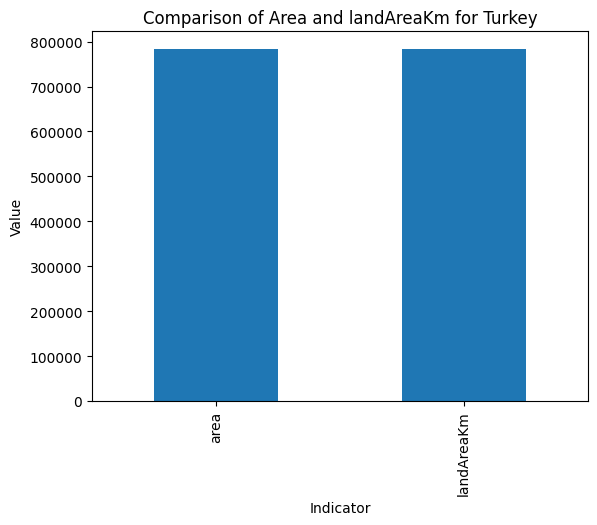

In [ ]:
compare_area_landAreaKm()

In [ ]:
# Sort the dataframe by the category column
df_sorted = df2.sort_values(by='2020')
# Display the sorted dataframe
df_sorted.head()

country    1970    1980    1990   2000   2010   2020
233      Vatican City   0.752   0.733   0.700  0.651  0.596  0.520
232           Tokelau   1.714   1.647   1.669  1.666  1.367  1.827
231              Niue   5.185   3.637   2.533  2.074  1.812  1.942
230  Falkland Islands   2.274   2.240   2.332  3.080  3.187  3.747
229        Montserrat  11.402  11.452  10.805  5.138  4.938  4.500

###To check The Population Trend of any Country

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the population data into a Pandas dataframe
df_p=df_new[['country','1970','1980','1990','2000','2010','2020']].copy()

def plot_population_trend():
    # Get the country name from user input
    country = input('Enter the name of the country: ')

    # Filter the dataframe for the specified country
    country_df = df_p.loc[df_p['country'] == country]

    # Check if the country is found in the dataframe
    if len(country_df) == 0:
        print(f'{country} data not found.')
        return

    # Get the list of years and population values for the specified country
    years = country_df.columns[1:]
    populations = country_df.values[0][1:]

    # Create a line chart
    plt.plot(years, populations)

    # Set the x-axis label
    plt.xlabel('Year')

    # Set the y-axis label
    plt.ylabel('Population')

    # Set the chart title
    plt.title(f'Population trend for {country}')

    # Display the chart
    plt.show()

Enter the name of the country: Brazil


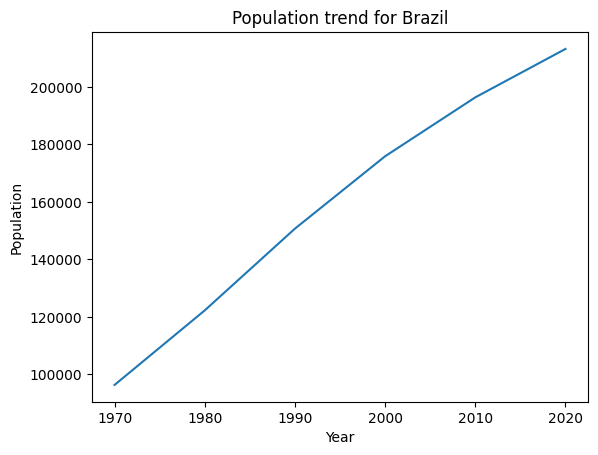

In [ ]:
plot_population_trend()

###Top 20 country Area wise

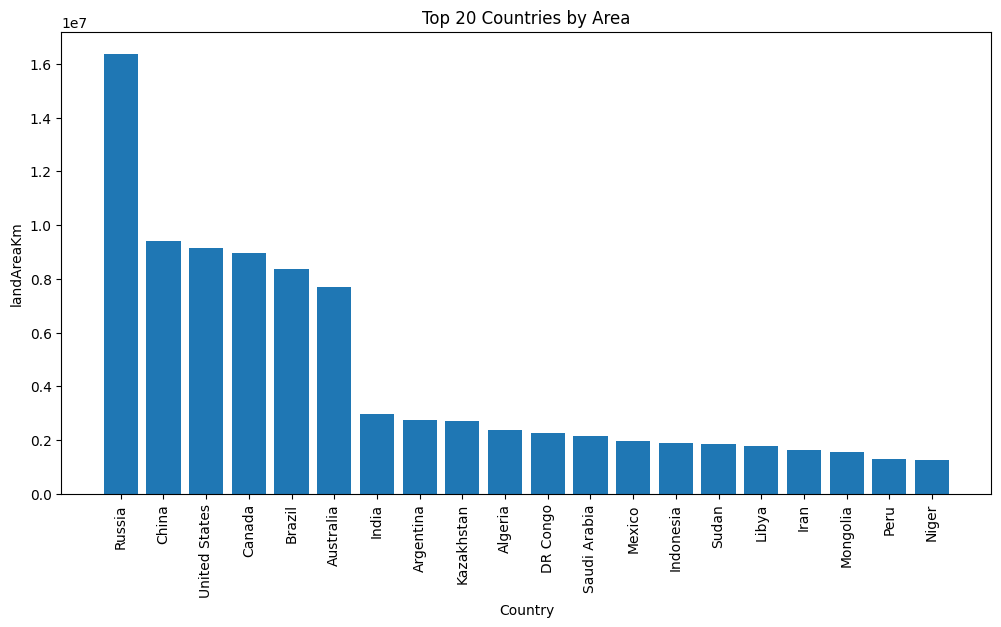

In [ ]:
# Sort the DataFrame by 'area' column in descending order and select top 20 rows
top20_countries = df4.sort_values(by='landAreaKm', ascending=False).head(20)

# Create a bar chart of the top 20 countries
plt.figure(figsize=(12, 6))
plt.bar(top20_countries['country'], top20_countries['landAreaKm'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('landAreaKm')
plt.title('Top 20 Countries by Area')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dfg = df_new

def compare_area_density(country):
    country_data = dfg[dfg['country']==country]
    area = country_data['area'].values[0]
    land_area = country_data['landAreaKm'].values[0]
    density = country_data['density'].values[0]

    if area >= land_area:
        return f"{country}'s area is {area} km², which is greater than or equal to its land area of {land_area} km²."
    else:
        return f"{country}'s land area of {land_area} km² is greater than its area of {area} km²."

    compare_columns = ['area', 'density']
    country_data[compare_columns].plot(kind='bar', rot=0)
    plt.xlabel('Countries')
    plt.ylabel('Value')
    plt.title('Comparison of Area and Density')
    plt.show()

# Get user input for country name
country = input("Enter the name of a country: ")

# Call the function
print(compare_area_density(country))


Enter the name of a country: Russia
Russia's area is 17098242 km², which is greater than or equal to its land area of 16376870.0 km².


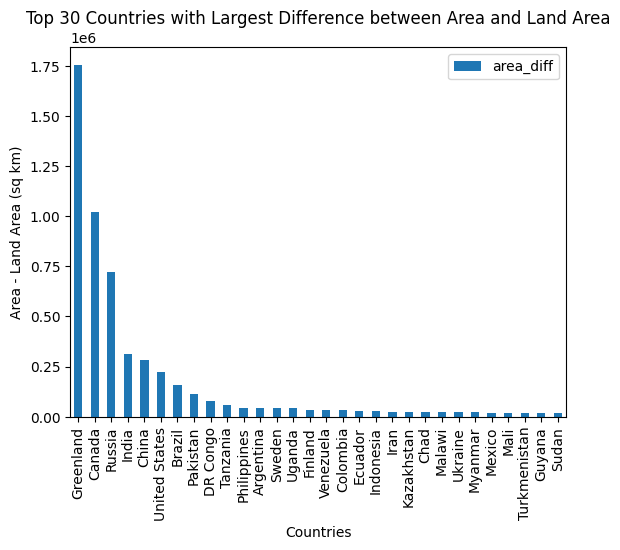

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Subtract landAreaKm from area to get the difference
dfg['area_diff'] = dfg['area'] - dfg['landAreaKm']

# Sort the DataFrame by area_diff in descending order and take top 30 rows
top30 = dfg.sort_values(by='area_diff', ascending=False).head(30)

# Plot a bar graph of the top 30 countries
top30.plot(kind='bar', x='country', y='area_diff', rot=90)

# Add labels and title to the plot
plt.xlabel('Countries')
plt.ylabel('Area - Land Area (sq km)')
plt.title('Top 30 Countries with Largest Difference between Area and Land Area')

# set figure size

plt.figure(figsize=(10,10))

# Display the plot
plt.show()


Denmark and Canada then Russia  highest no of river and sea or costal area  can be larger than russia. inspite of accuring largest Land area Russia stood in third place.

#### Comparative trend of Top 15 countries in the world over the time

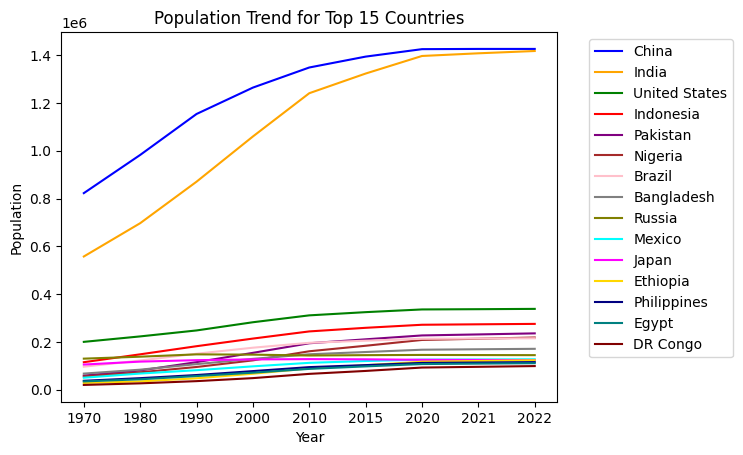

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = df_new[['country','1970','1980','1990','2000','2010','2015','2020','2021','2022','2030','2050']].copy()

# select top 15 countries by population in 2022
top_15 = df.nlargest(15, '2022')

# plot population trend for top 15 countries
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'navy', 'teal', 'maroon']
for i, country in enumerate(top_15['country']):
    plt.plot(df.columns[1:-2], top_15.iloc[i,1:-2], label=country, color=colors[i])

# add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Top 15 Countries')

# show legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show plot
plt.show()


<Axes: >

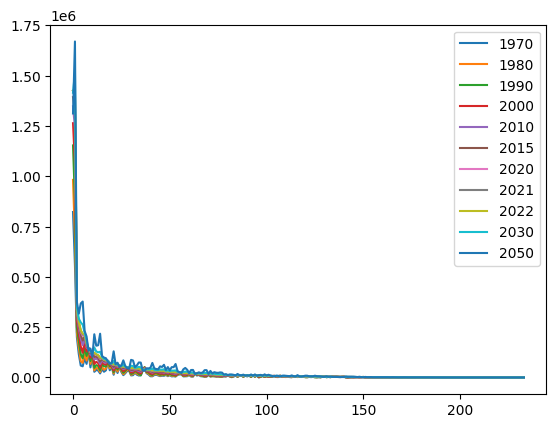

In [ ]:
df.plot()

<Axes: >

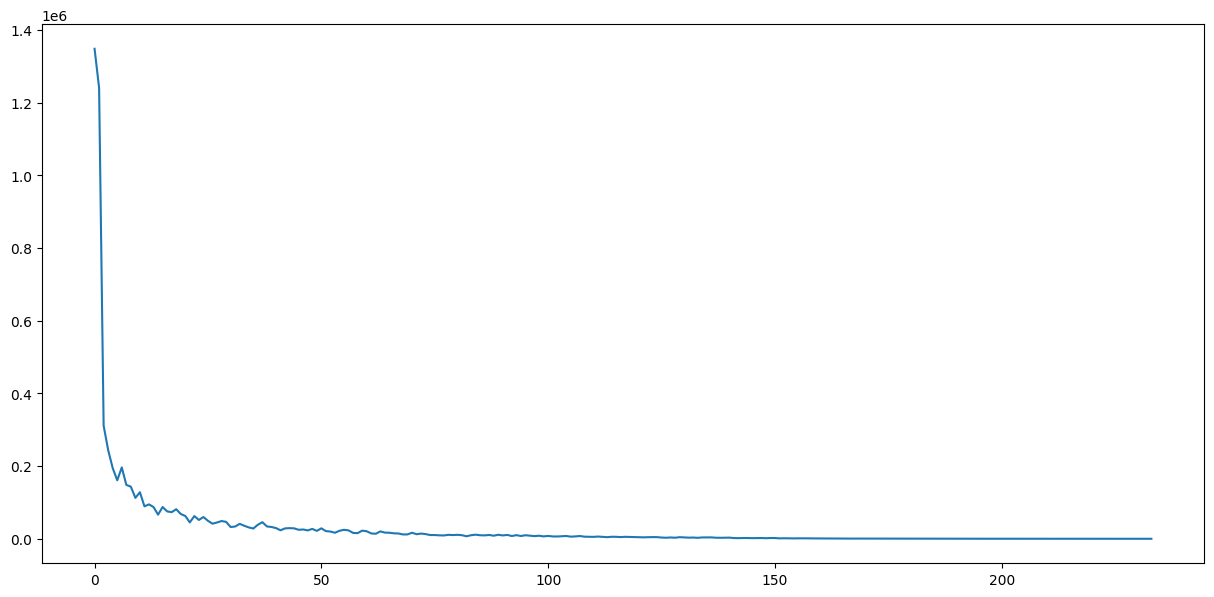

In [ ]:
df["2010"].plot(figsize=(15,7))

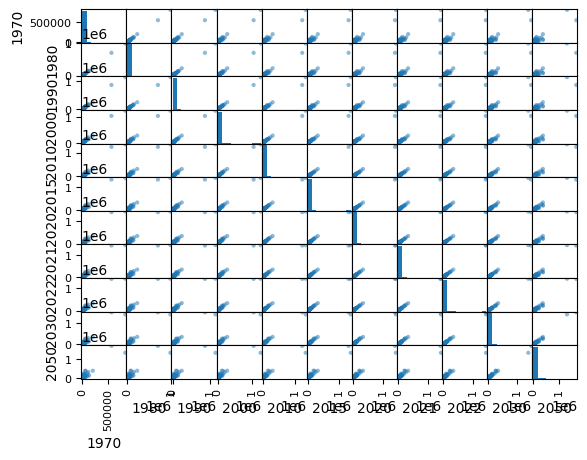

In [ ]:
pd.plotting.scatter_matrix(df);

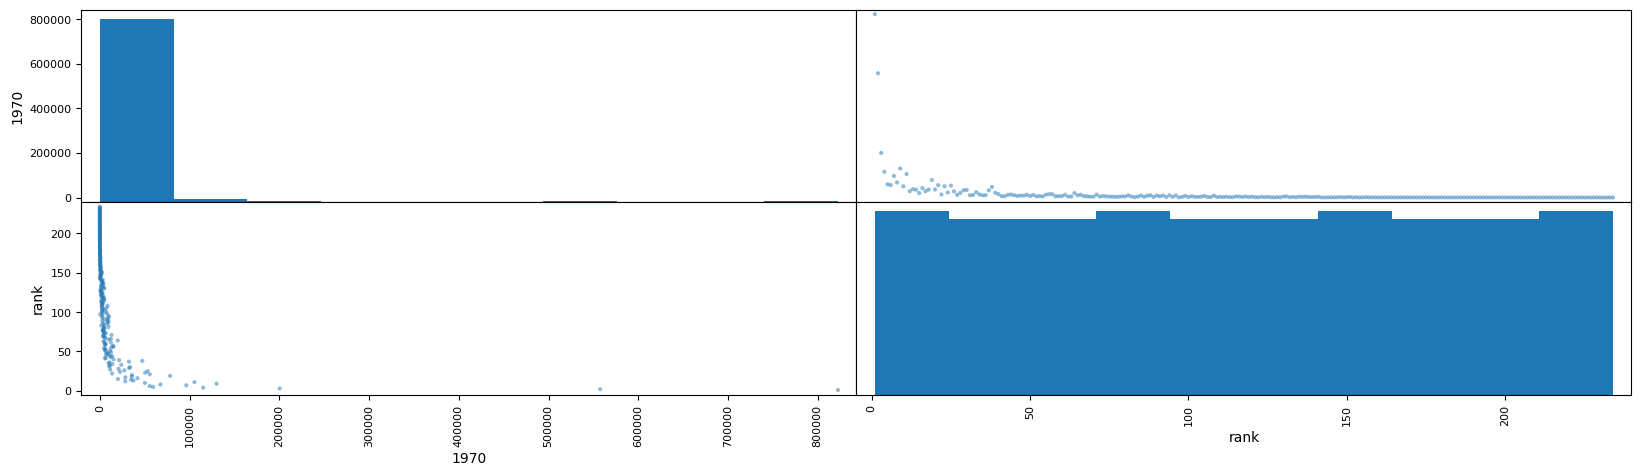

In [ ]:
pd.plotting.scatter_matrix(df4[["1970",
                               "rank"]], figsize=(20,5));

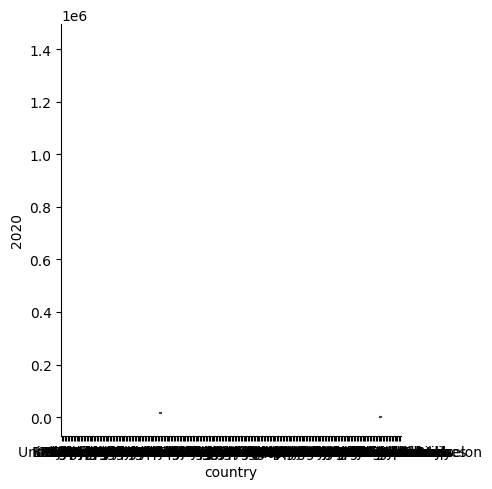

In [ ]:
sns.catplot(x="country", y="2020", hue="country",kind="box", data=df_p)

Text(0, 0.5, 'population')

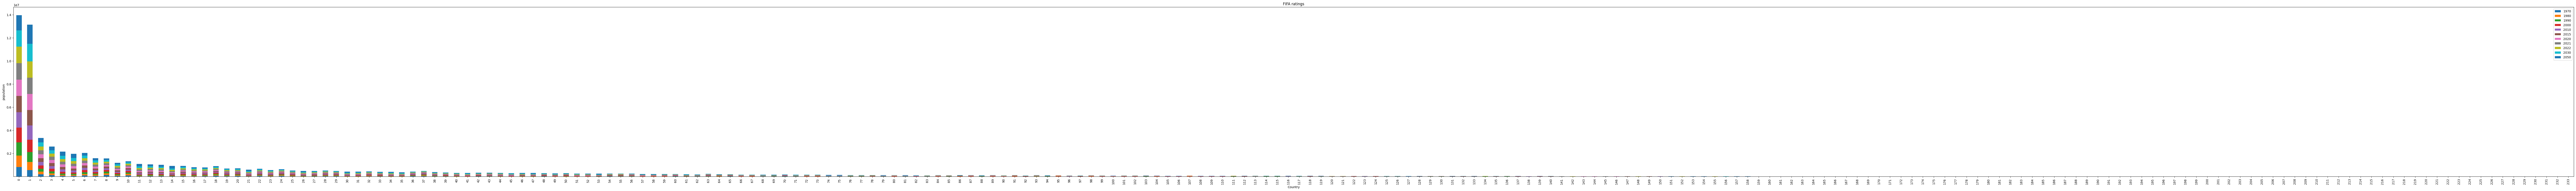

In [ ]:
df.plot(kind='bar', stacked=True,figsize=(150, 10))
plt.title("FIFA ratings")

plt.xlabel("Country")

plt.ylabel("population")

Text(0, 0.5, 'Ratings')

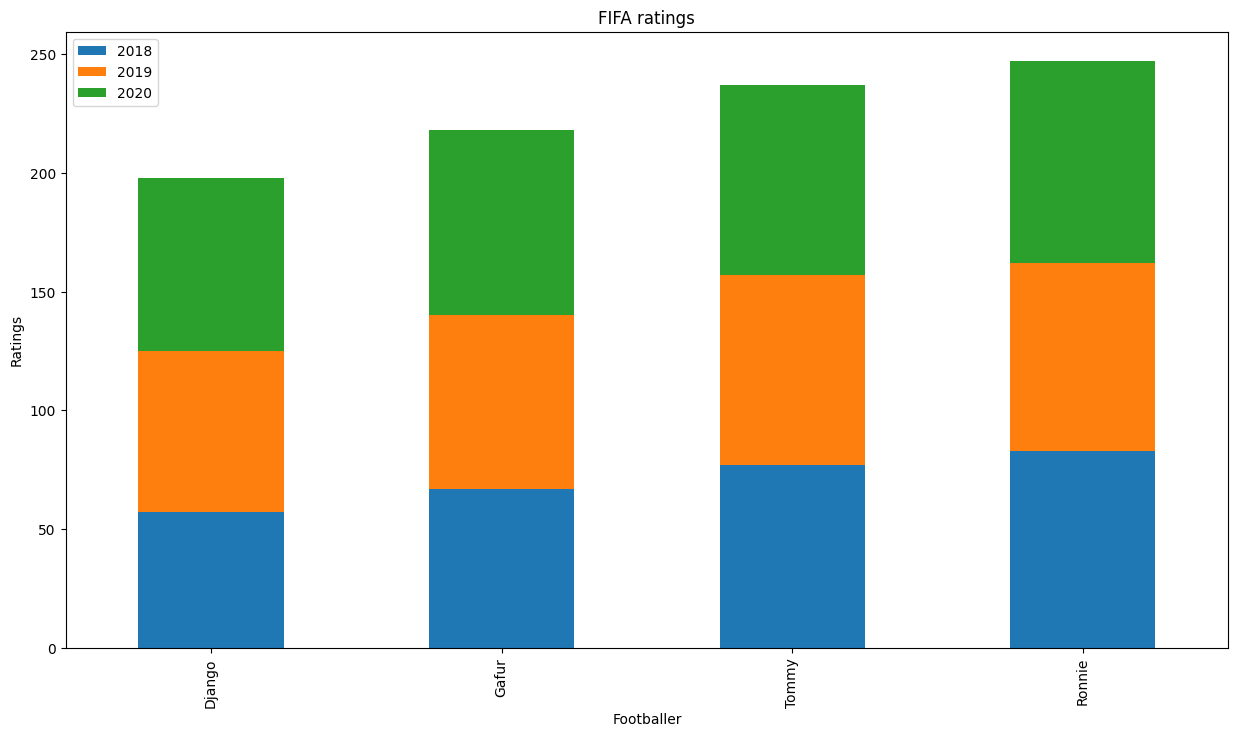

In [ ]:
import pandas as pd
plotdata = pd.DataFrame({
    "2018":[57,67,77,83],
    "2019":[68,73,80,79],
    "2020":[73,78,80,85]},
    index=["Django", "Gafur", "Tommy", "Ronnie"])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("FIFA ratings")

plt.xlabel("Footballer")

plt.ylabel("Ratings")

### Population Forcasting Using Arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,2 ARIMA Model
model = ARIMA(H.landAreaKm, order=(1, 1, 1)).fit()
model.summary()

In [ ]:
# Create Training and Test
train = H.area[:80]
test = H.area[80:]
test.shape,train.shape,H.shape

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  (pdq)
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

# Forecast
fc = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Focasting population for 10 years of any country


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


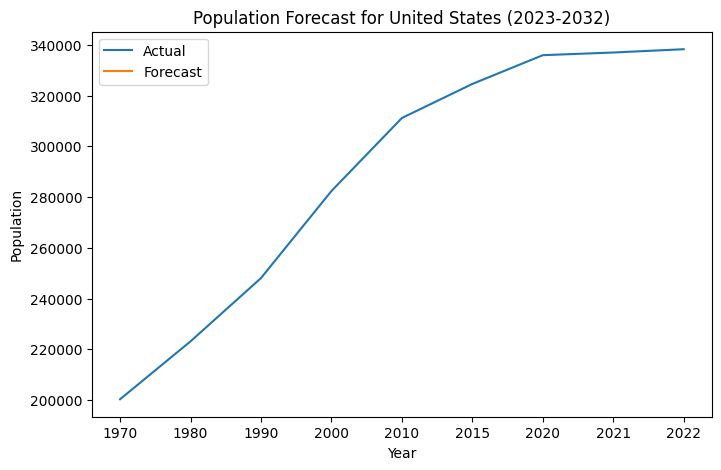

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data
df_p = df_new[['country','1970','1980','1990','2000','2010','2015','2020','2021','2022']].copy()
df_p.set_index('country', inplace=True)

def forecast_population(country):
    # Select data for the given country
    data = df_p.loc[country][['1970','1980','1990','2000','2010','2015','2020','2021','2022']]

    # Build ARIMA model
    model = ARIMA(data, order=(1, 1, 1))
    fitted = model.fit()

    # Forecast
    fc = fitted.forecast(10, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=[2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032])

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(data, label='Actual')
    plt.plot(fc_series, label='Forecast')
    plt.title(f'Population Forecast for {country} (2023-2032)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

# Example usage: forecast population trend for United States for next 10 years
forecast_population('United States')

In [ ]:
df_new = df.rename(columns={'pop2022':'2022','pop2021':'2021','pop2020':'2020','pop2050':'2050','pop2030':'2030','pop2015':'2015','pop2010':'2010','pop2000':'2000','pop1990':'1990','pop1980':'1980','pop1970':'1970'},inplace=False)
df_new.head()

country        1970        1980         1990         2000  \
0          China  822534.450  982372.466  1153704.252  1264099.069   
1          India  557501.301  696828.385   870452.165  1059633.675   
2  United States  200328.340  223140.018   248083.732   282398.554   
3      Indonesia  115228.394  148177.096   182159.874   214072.421   
4       Pakistan   59290.872   80624.057   115414.069   154369.924   

          2010         2015         2020         2021         2022  \
0  1348191.368  1393715.448  1424929.781  1425893.465  1425887.337   
1  1240613.620  1322866.505  1396387.127  1407563.842  1417173.173   
2   311182.845   324607.776   335942.003   336997.624   338289.857   
3   244016.173   259091.970   271857.970   273753.191   275501.339   
4   194454.498   210969.298   227196.741   231402.117   235824.862   

          2030         2050  
0  1415605.906  1312636.325  
1  1514994.080  1670490.596  
2   352162.301   375391.963  
3   292150.100   317225.213  
4   274029.836   367808.468

In [ ]:
df.country.unique()

array(['China', 'India', 'United States', 'Indonesia', 'Pakistan',
       'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Japan',
       'Ethiopia', 'Philippines', 'Egypt', 'DR Congo', 'Vietnam', 'Iran',
       'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'Tanzania',
       'France', 'South Africa', 'Italy', 'Myanmar', 'Kenya', 'Colombia',
       'South Korea', 'Spain', 'Uganda', 'Sudan', 'Argentina', 'Algeria',
       'Iraq', 'Afghanistan', 'Poland', 'Ukraine', 'Canada', 'Morocco',
       'Saudi Arabia', 'Angola', 'Uzbekistan', 'Peru', 'Malaysia',
       'Yemen', 'Ghana', 'Mozambique', 'Nepal', 'Madagascar', 'Venezuela',
       'Ivory Coast', 'Cameroon', 'Niger', 'Australia', 'North Korea',
       'Taiwan', 'Burkina Faso', 'Mali', 'Syria', 'Sri Lanka', 'Malawi',
       'Zambia', 'Romania', 'Chile', 'Kazakhstan', 'Ecuador', 'Guatemala',
       'Chad', 'Somalia', 'Netherlands', 'Senegal', 'Cambodia',
       'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Tunisia',
   

In [ ]:
df_new.plot(kind="bar",figsize=(500, 40))

plt.title("Polpulation")

plt.xlabel("2000")

plt.ylabel("country")


Text(0, 0.5, 'country')

<Axes: >

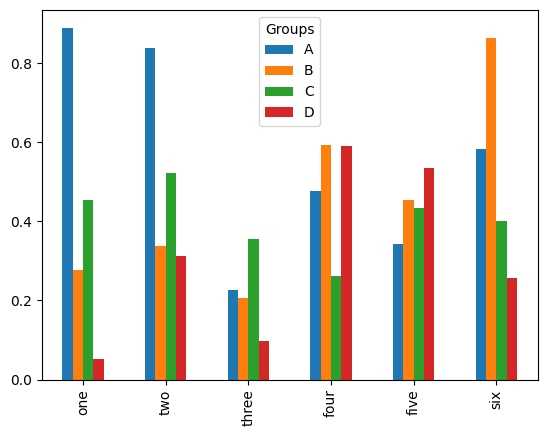

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Groups')) #name is for legend title
df.head()
df.plot.bar()

plt.figure()

df.plot.barh(stacked=True, alpha=0.8)
df.plot.bar(stacked=False, alpha=0.8)
plt.close('all')
df.plot(kind='bar')

In [ ]:
type(np.random.rand(6,4))

numpy.ndarray

In [ ]:
df_new.shape

(234, 12)

In [ ]:
df_new

country        1970        1980         1990         2000  \
0               China  822534.450  982372.466  1153704.252  1264099.069   
1               India  557501.301  696828.385   870452.165  1059633.675   
2       United States  200328.340  223140.018   248083.732   282398.554   
3           Indonesia  115228.394  148177.096   182159.874   214072.421   
4            Pakistan   59290.872   80624.057   115414.069   154369.924   
..                ...         ...         ...          ...          ...   
229        Montserrat      11.402      11.452       10.805        5.138   
230  Falkland Islands       2.274       2.240        2.332        3.080   
231              Niue       5.185       3.637        2.533        2.074   
232           Tokelau       1.714       1.647        1.669        1.666   
233      Vatican City       0.752       0.733        0.700        0.651   

            2010         2015         2020         2021         2022  \
0    1348191.368  1393715.448  1424929.781  1425893.465  1425887.337   
1    1240613.620  1322866.505  1396387.127  1407563.842  1417173.173   
2     311182.845   324607.776   335942.003   336997.624   338289.857   
3     244016.173   259091.970   271857.970   273753.191   275501.339   
4     194454.498   210969.298   227196.741   231402.117   235824.862   
..           ...          ...          ...          ...          ...   
229        4.938        5.059        4.500        4.417        4.390   
230        3.187        3.408        3.747        3.764        3.780   
231        1.812        1.847        1.942        1.937        1.934   
232        1.367        1.454        1.827        1.849        1.871   
233        0.596        0.564        0.520        0.511        0.510   

            2030         2050  
0    1415605.906  1312636.325  
1    1514994.080  1670490.596  
2     352162.301   375391.963  
3     292150.100   317225.213  
4     274029.836   367808.468  
..           ...          ...  
229        4.301        3.781  
230        3.869        3.779  
231        1.948        2.096  
232        2.046        2.430  
233        0.561        0.731  

[234 rows x 12 columns]

In [ ]:
import pandas as pd

# Assuming you have the DataFrame 'df'
# If not, you can create one using pandas.DataFrame() or read from a file using pd.read_csv(), pd.read_excel(), etc.

# Drop multiple rows by specifying their indices in a list
rows_to_drop = [0, 1, 2, 3, 4]
df_dropped = df_new.drop(rows_to_drop)

# The resulting DataFrame 'df_dropped' will have rows with indices 2, 4, and 6 removed.
df_dropped.head()

country        1970        1980        1990        2000        2010  \
5     Nigeria   55569.264   72951.439   95214.257  122851.984  160952.853   
6      Brazil   96369.875  122288.383  150706.446  175873.720  196353.492   
7  Bangladesh   67541.860   83929.765  107147.651  129193.327  148391.139   
8      Russia  130093.010  138257.420  148005.704  146844.839  143242.599   
9      Mexico   50289.306   67705.186   81720.428   97873.442  112532.401   

         2015        2020        2021        2022        2030        2050  
5  183995.785  208327.405  213401.323  218541.212  262580.426  377459.883  
6  205188.205  213196.304  214326.223  215313.498  223908.968  230885.725  
7  157830.000  167420.951  169356.251  171186.372  184424.144  203904.900  
8  144668.389  145617.329  145102.755  144713.314  141432.741  133133.035  
9  120149.897  125998.302  126705.138  127504.125  134534.107  143772.364

<ipython-input-45-eed6da390650>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


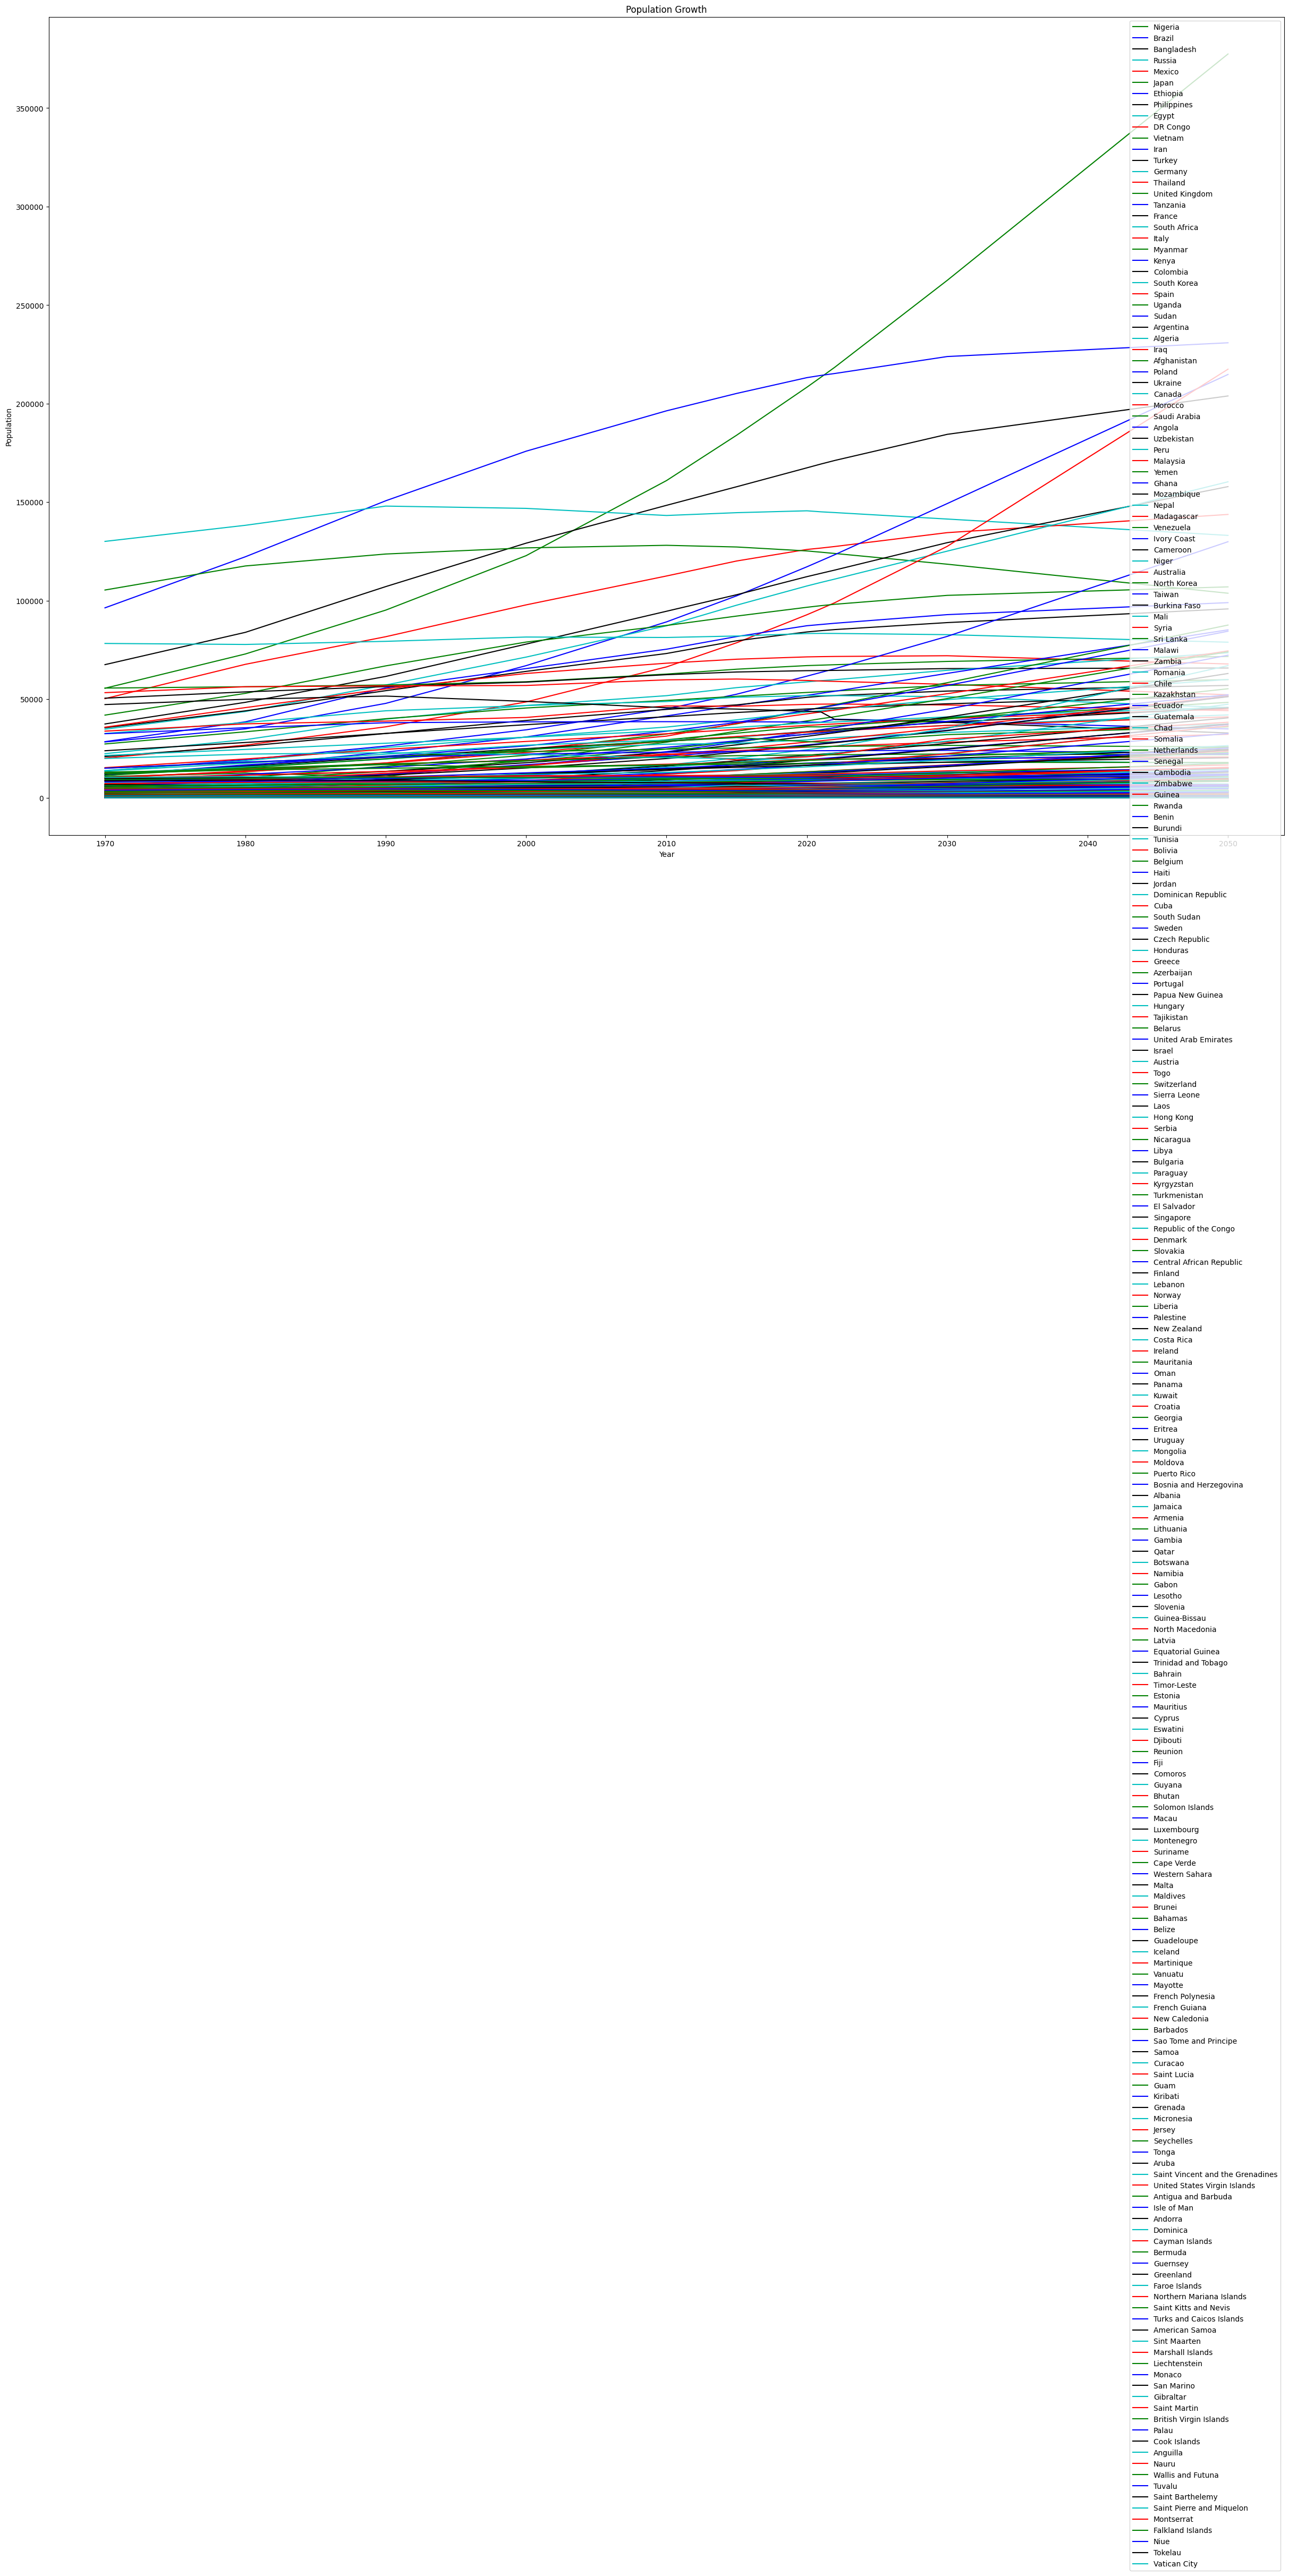

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df_new'
# If not, you can create one using pandas.DataFrame() or read from a file using pd.read_csv(), pd.read_excel(), etc.

# Melt the DataFrame to have 'country' as a categorical variable and years as a numerical variable
melted_df = df_dropped.melt(id_vars=['country'], var_name='Year', value_name='Population')

# Convert 'Year' column to numeric type
melted_df['Year'] = pd.to_numeric(melted_df['Year'])

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot each country's population data with a different color
countries = melted_df['country'].unique()
colors = ['g', 'b', 'k', 'c', 'r']

for i, country in enumerate(countries):
    country_data = melted_df[melted_df['country'] == country]
    ax.plot(country_data['Year'], country_data['Population'], color=colors[i % len(colors)])

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population Growth")

# Set custom labels for the legend (country names)
ax.legend(countries, loc='best')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df_new'
# If not, you can create one using pandas.DataFrame() or read from a file using pd.read_csv(), pd.read_excel(), etc.

# Melt the DataFrame to have 'country' as a categorical variable and years as a numerical variable
melted_df = df_new.melt(id_vars=['country'], var_name='Year', value_name='Population')

# Convert 'Year' column to numeric type
melted_df['Year'] = pd.to_numeric(melted_df['Year'])

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot each country's population data with a different line style and color
countries = melted_df['country'].unique()
colors = ['g', 'b', 'k', 'c', 'r']
linestyles = ['-', '--', '-.', ':']

for i, country in enumerate(countries):
    country_data = melted_df[melted_df['country'] == country]
    ax.plot(country_data['Year'], country_data['Population'], label=country, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)])

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population Growth")

# Add a legend at the bottom in cross-tab format
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(countries))

# Show the plot
plt.tight_layout()
plt.show()



<ipython-input-46-7e0aab0c9733>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<ipython-input-48-a942cde75d21>:56: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


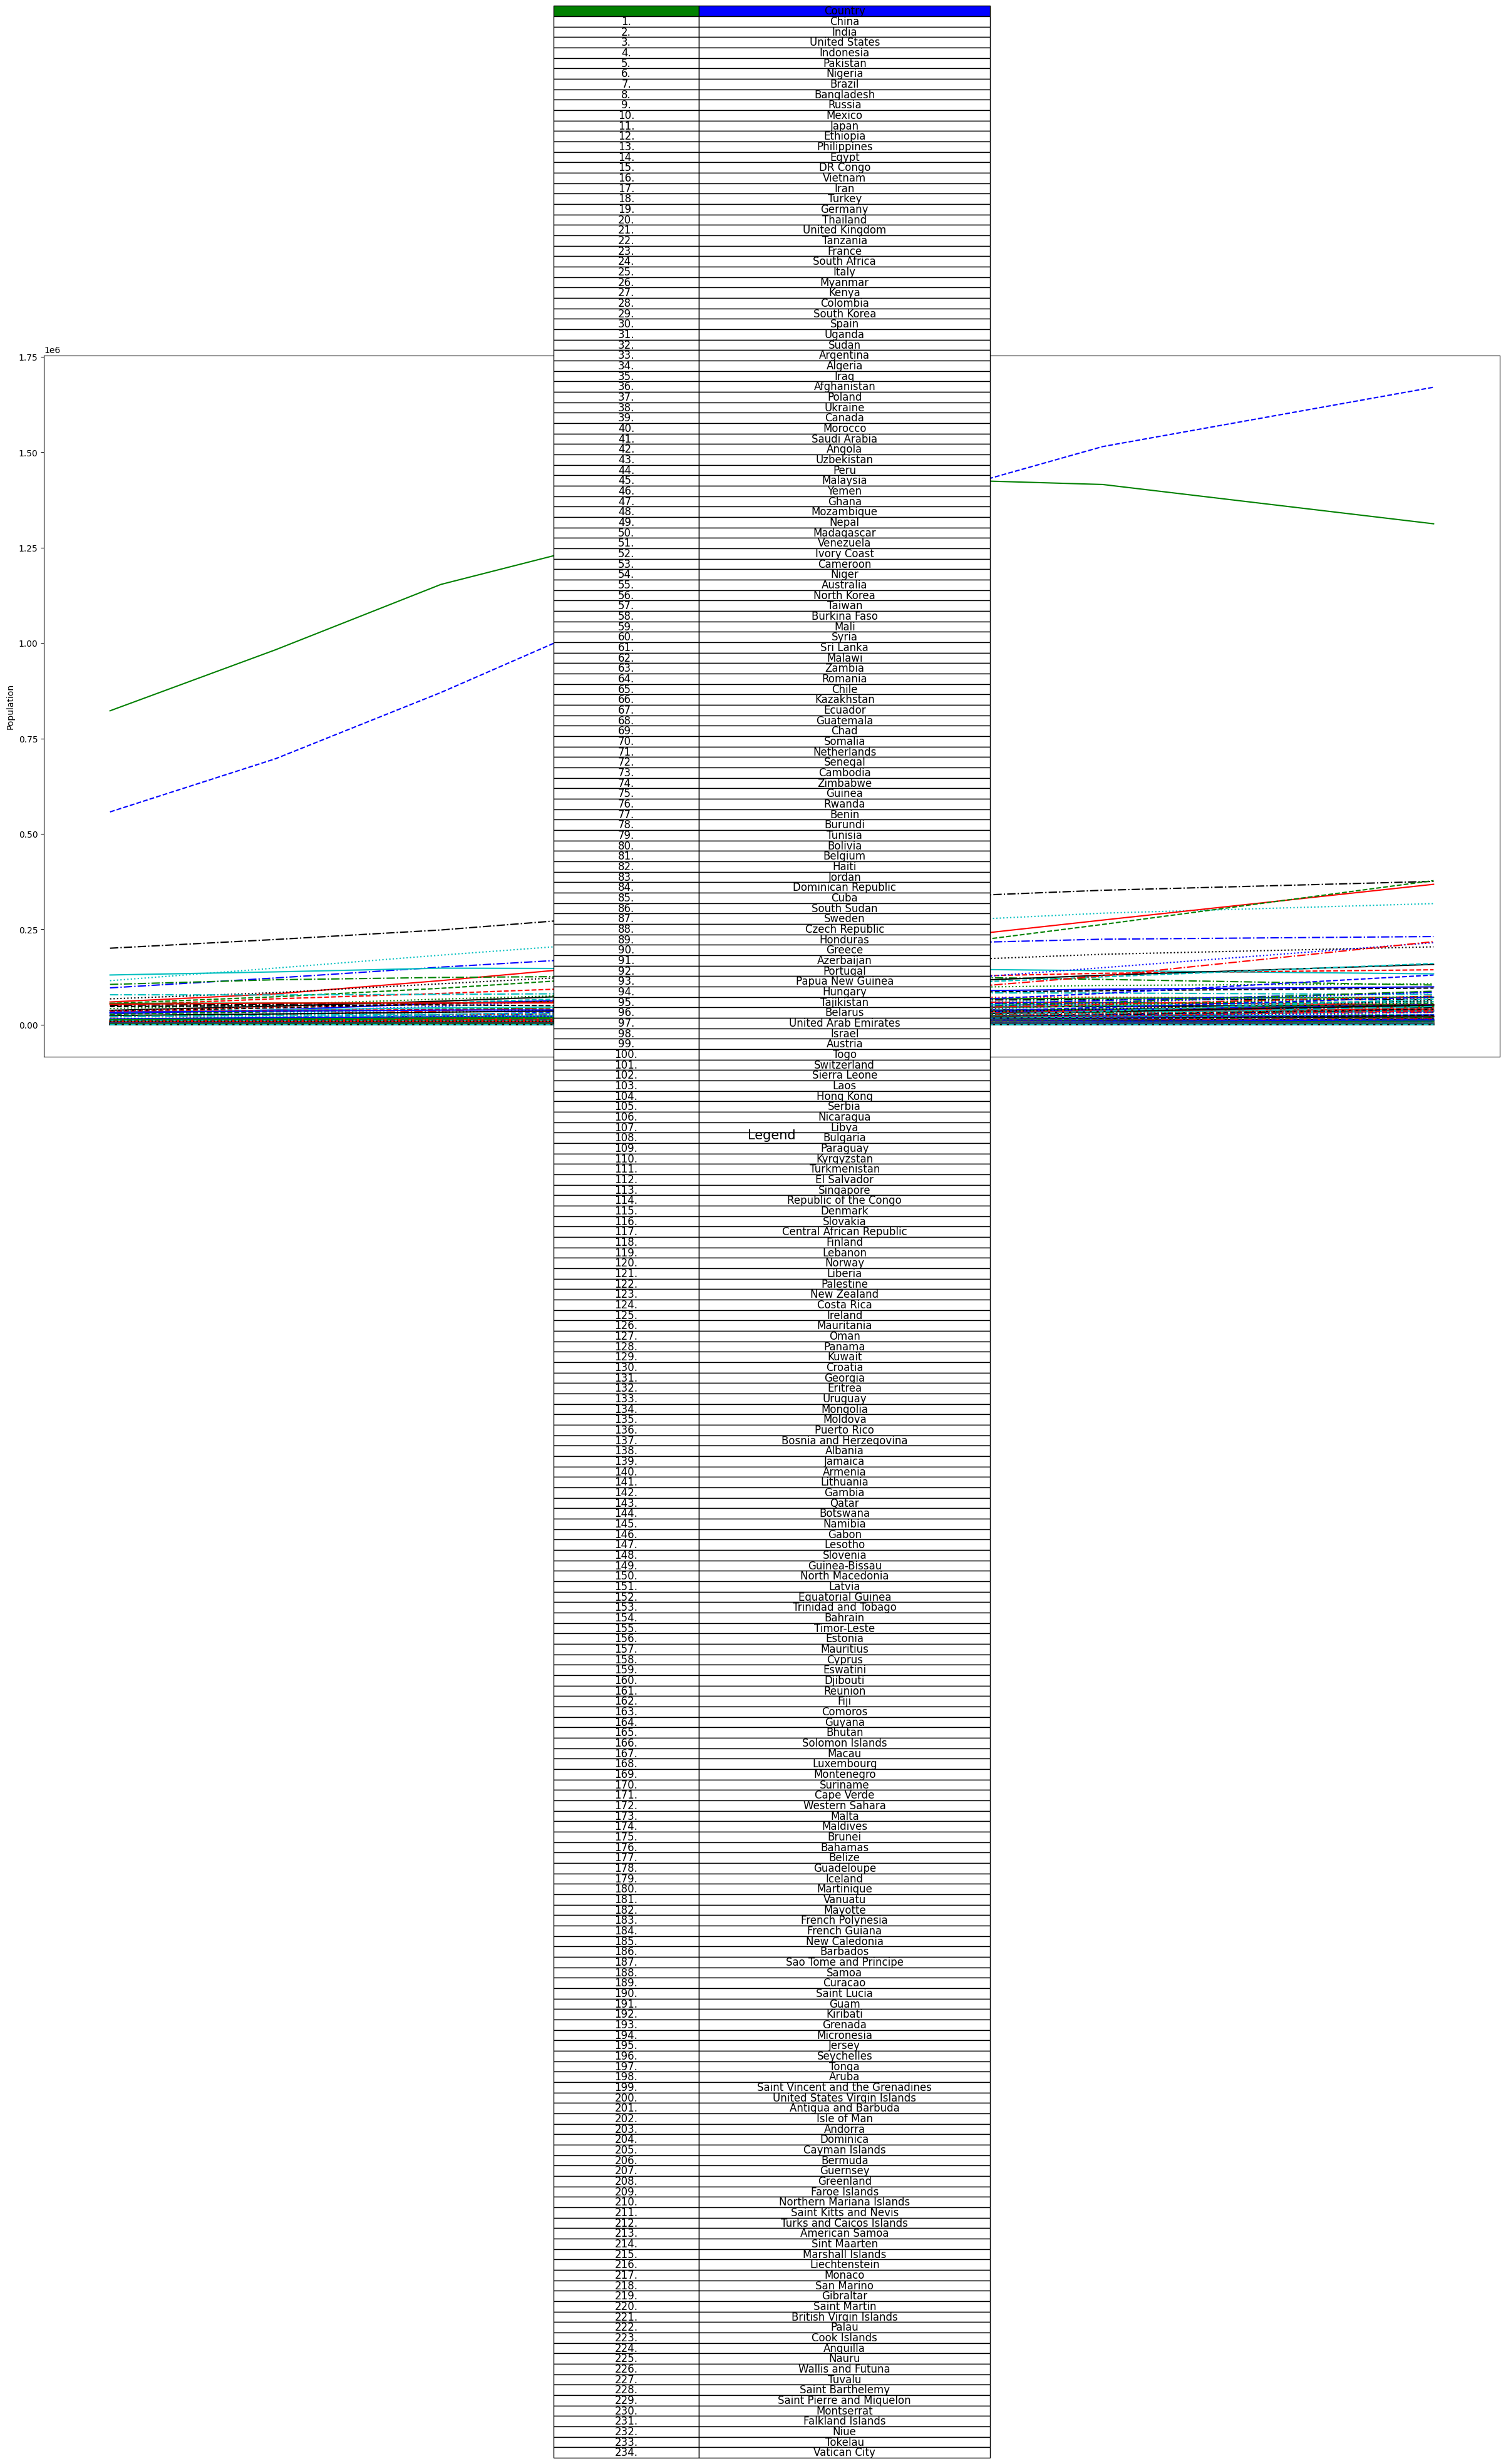

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Assuming you have the DataFrame 'df_new'
# If not, you can create one using pandas.DataFrame() or read from a file using pd.read_csv(), pd.read_excel(), etc.

# Melt the DataFrame to have 'country' as a categorical variable and years as a numerical variable
melted_df = df_new.melt(id_vars=['country'], var_name='Year', value_name='Population')

# Convert 'Year' column to numeric type
melted_df['Year'] = pd.to_numeric(melted_df['Year'])

# Create a figure and gridspec for the plot
fig = plt.figure(figsize=(30, 20))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])  # 2 rows, 1 column, with the first row taller for the main plot

# Create the main subplot (row 0)
ax_main = plt.subplot(gs[0])

# Plot each country's population data with a different line style and color
countries = melted_df['country'].unique()
colors = ['g', 'b', 'k', 'c', 'r']
linestyles = ['-', '--', '-.', ':']

for i, country in enumerate(countries):
    country_data = melted_df[melted_df['country'] == country]
    ax_main.plot(country_data['Year'], country_data['Population'], label=country, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)])

# Set labels and title for the main plot
ax_main.set_xlabel("Year")
ax_main.set_ylabel("Population")
ax_main.set_title("Population Growth")

# Remove x-ticks for the main plot to avoid overlapping with the legend
ax_main.set_xticks([])

# Create the legend subplot (row 1)
ax_legend = plt.subplot(gs[1])

# Hide axis for the legend subplot
ax_legend.axis('off')

# Create a custom legend table
legend_data = [(f"{i+1}.", country) for i, country in enumerate(countries)]
legend_table = ax_legend.table(cellText=legend_data, colLabels=["", "Country"], cellLoc="center", loc='center', colColours=colors, colWidths=[0.1, 0.2])

# Set font size for the legend table
legend_table.auto_set_font_size(False)
legend_table.set_fontsize(12)

# Add a title for the legend table
ax_legend.set_title("Legend", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-36-8432e95fafb1>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


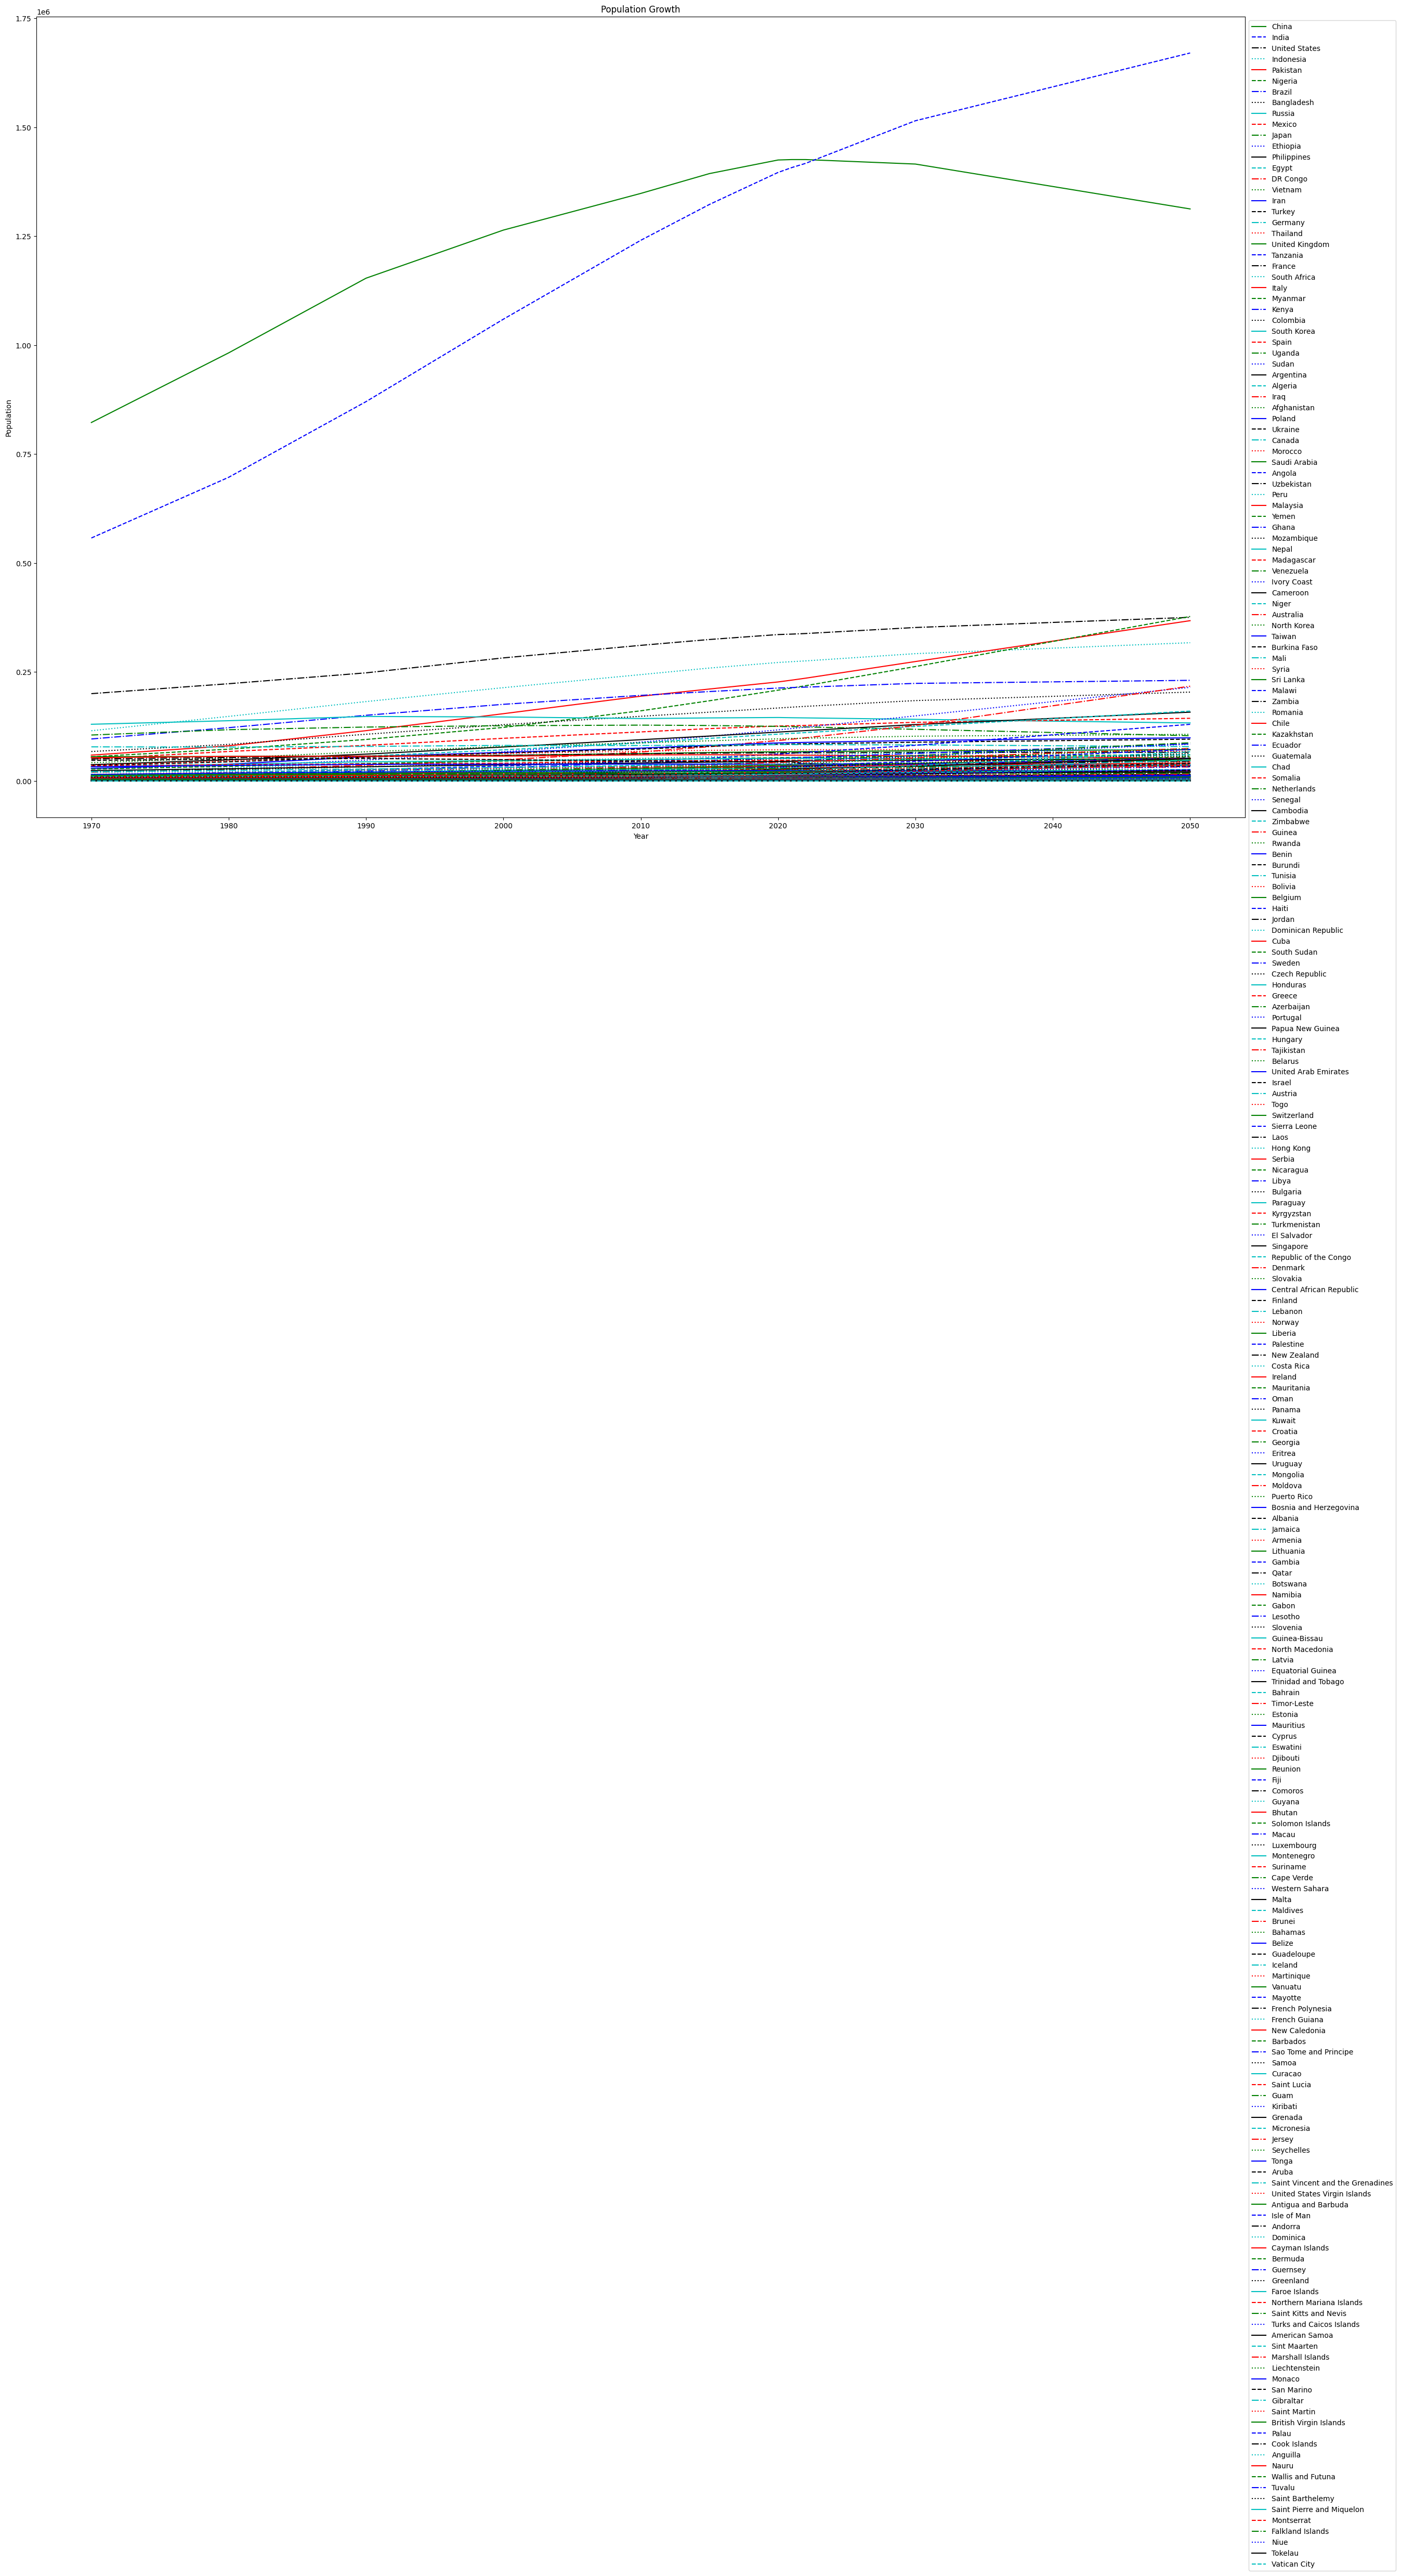

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df_new'
# If not, you can create one using pandas.DataFrame() or read from a file using pd.read_csv(), pd.read_excel(), etc.

# Melt the DataFrame to have 'country' as a categorical variable and years as a numerical variable
melted_df = df_new.melt(id_vars=['country'], var_name='Year', value_name='Population')

# Convert 'Year' column to numeric type
melted_df['Year'] = pd.to_numeric(melted_df['Year'])

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot each country's population data with a different line style and color
countries = melted_df['country'].unique()
colors = ['g', 'b', 'k', 'c', 'r']
linestyles = ['-', '--', '-.', ':']

for i, country in enumerate(countries):
    country_data = melted_df[melted_df['country'] == country]
    ax.plot(country_data['Year'], country_data['Population'], label=country, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)])

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population Growth")

# Add a legend with bbox_to_anchor to adjust its position
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.tight_layout()
plt.show()
